In [5]:
import numpy as np
import matplotlib.pyplot as plt
import operator

games={}
genres=set()
publishers=set()

with open('dataset/games.csv', 'r', encoding = "ISO-8859-1") as ip:
    next(ip)
    for line in ip:
        line=line.strip()
        line=line.split(',')
        publishers.add(line[4])
        genres.add(line[3])
        if line[0] in games:
            games[line[0]].extend(line)
        else:
            games[line[0]] = line
        

print('Number of unique games', len(games.keys()))
print('Number of genres', len(genres))
print('Number of publishers', len(publishers))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

def plotGraph(NA, EU,JP,Other,pub, i):
    N = len(genres)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.18       # the width of the bars
    plt.figure(i, figsize=(11,7))
    rects1 = plt.bar(ind, NA, width, color='r')
    rects2 = plt.bar(ind + width, EU, width, color='y')
    rects3 = plt.bar(ind + 2*width, JP, width, color='b')
    rects4 = plt.bar(ind + 3* width , Other, width, color='g')
    plt.ylabel('Sales (in millions)')
    plt.xlabel('Genres')
    plt.title('Sales by Genres and Regions for Publisher ' + pub)
    plt.xticks(ind + width / 2,sorted(genres))
    plt.legend((rects1[0], rects2[0], rects3[0], rects4[0] ), ('North America', 'Europe', 'Japan','Other'))
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
    

Number of unique games 11563
Number of genres 13
Number of publishers 582


[('Nintendo', 1788.2399999999977), ('Electronic Arts', 1101.9099999999994), ('Activision', 683.3499999999988), ('Sony Computer Entertainment', 603.9399999999993), ('Ubisoft', 461.11999999999944)]


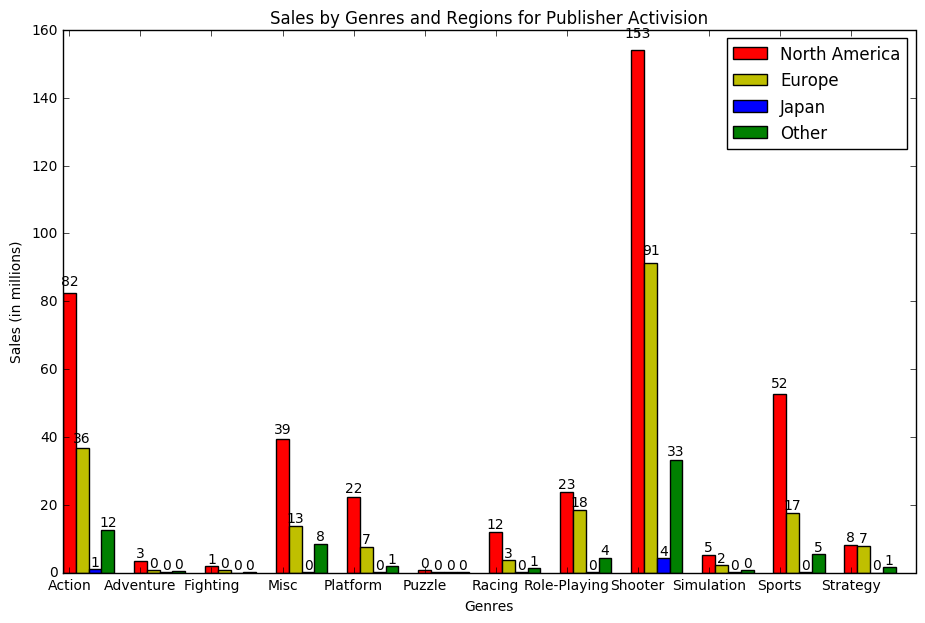

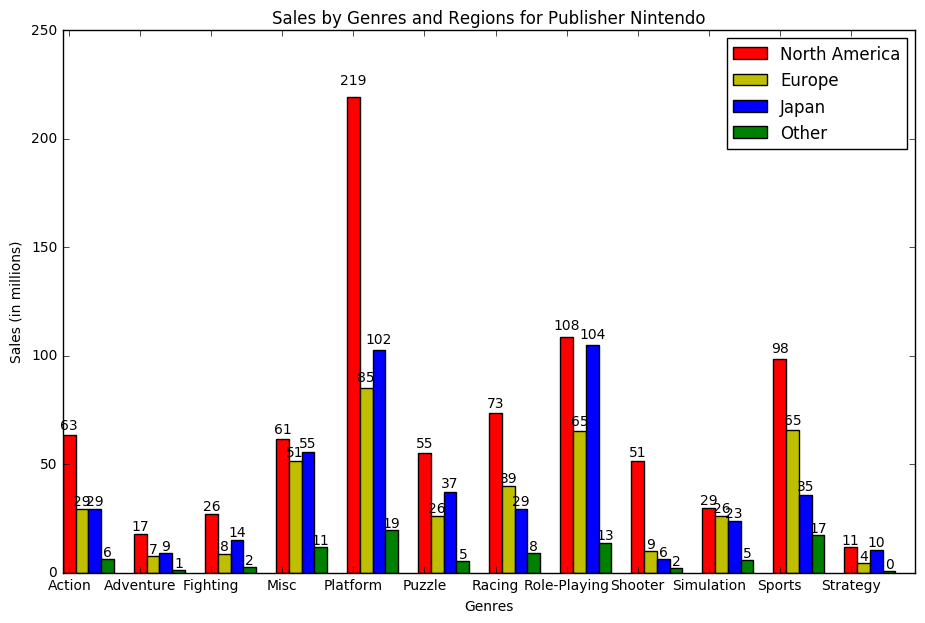

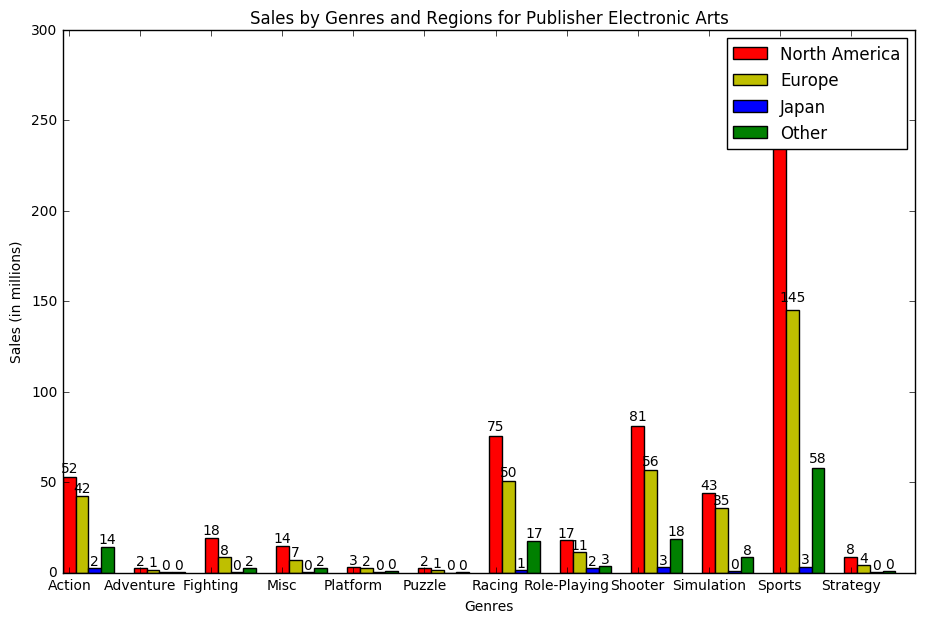

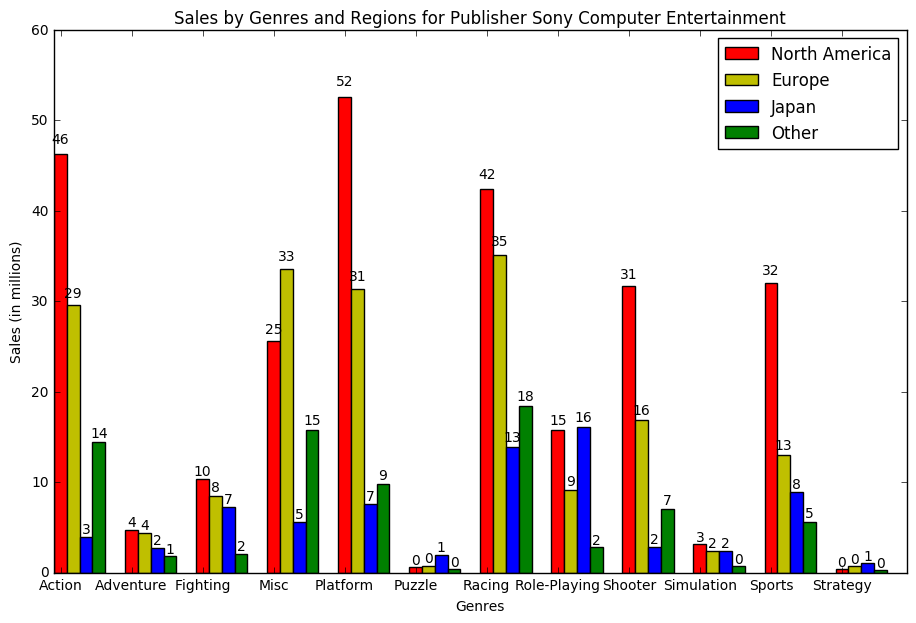

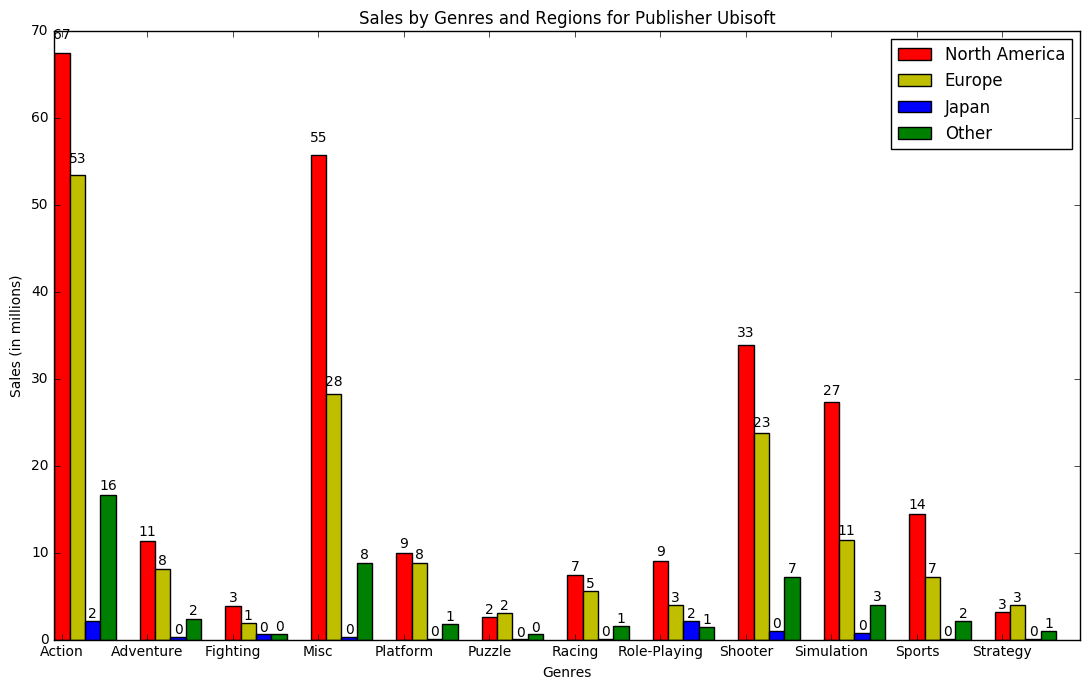

In [6]:
publisher_GlobalSales = {}
region_vs_sale_genre = {}
genres.remove('')
i = 1

for publisher in publishers:
    total_sales = 0.0
    for game in games.keys():
        total_games = 1
        i=0
        if len(games[game]) > 16:
            total_games = int(len(games[game])/16)
        while i < total_games:
                if publisher == games[game][(16*i + 4)]:
                    total_sales +=  float(games[game][(16*i)+9])
                i = i + 1
    publisher_GlobalSales[publisher] = total_sales

ToppublishersbyGlobalSales = sorted(publisher_GlobalSales.items(), key=operator.itemgetter(1), reverse=True)

print(ToppublishersbyGlobalSales[:5])
for publisher,val in ToppublishersbyGlobalSales[:5]:
    region_vs_sale_genre[publisher] = {}
    for genre in genres:
        total_NA_sales = 0.0
        total_EU_sales = 0.0
        total_Other_sales = 0.0
        total_JP_sales = 0.0
        for game in games.keys():
            total_games = 1
            i=0
            if len(games[game]) > 16:
                total_games = int(len(games[game])/16)
            while i < total_games:
                    if publisher == games[game][(16*i + 4)] and genre == games[game][(16*i + 3)]:
                        total_NA_sales +=  float(games[game][(16*i+5)])
                        total_EU_sales +=  float(games[game][(16*i+6)])
                        total_JP_sales +=  float(games[game][(16*i+7)])
                        total_Other_sales +=  float(games[game][(16*i+8)])
                    i = i + 1
        region_vs_sale_genre[publisher][genre] = [total_NA_sales,total_EU_sales,total_JP_sales,total_Other_sales]

for publisher in region_vs_sale_genre:
    list_NA = []
    list_EU = []
    list_Other = []
    list_JP = []
    for g in sorted(region_vs_sale_genre[publisher]):
        list_NA.append(region_vs_sale_genre[publisher][g][0])
        list_EU.append(region_vs_sale_genre[publisher][g][1])
        list_JP.append(region_vs_sale_genre[publisher][g][2])
        list_Other.append(region_vs_sale_genre[publisher][g][3])
    plotGraph(list_NA,list_EU,list_JP,list_Other,publisher,i)
    i= i + 1
plt.tight_layout()
plt.show()

    


            